In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [13]:
spb_dataset = pd.read_csv('./datasets/initial/spb.csv')
smr_dataset = pd.read_csv('./datasets/initial/smr.csv')

260

In [39]:
smr_dataset.drop_duplicates(inplace=True)
spb_dataset.drop_duplicates(inplace=True)

In [26]:
def plot_hists(feature):
    pyplot.hist(spb_dataset[feature], density=True, bins=15)
    pyplot.hist(smr_dataset[feature], density=True, bins=15, color=(1, 1, 0, 0.5))

In [ ]:
spb_dataset.filter()

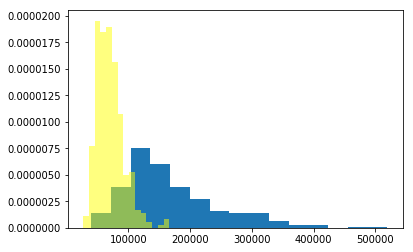

In [40]:
plot_hists('price_per_m')

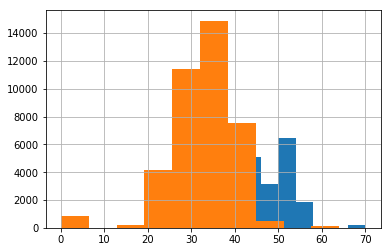

In [14]:
spb_dataset.median_salaries_1000.hist()
smr_dataset.median_salaries_1000.hist()

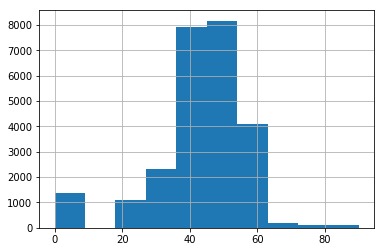

In [8]:
spb_dataset.median_salaries_500.hist()

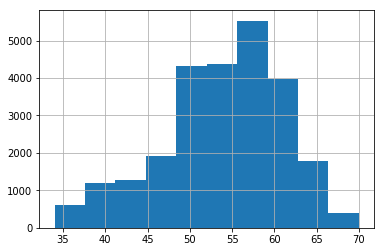

In [9]:
spb_dataset.mean_salaries_1000.hist()

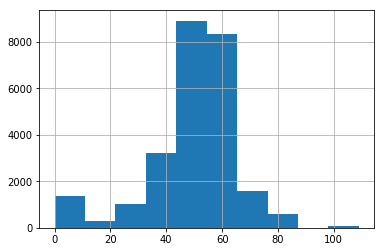

In [10]:
spb_dataset.mean_salaries_500.hist()